In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image

In [42]:
#Importamos dataset de ciudad de buenos aires: uno de recorridos de bicicleta para el año 2018 y otro de usuarios

usuarios = pd.read_csv(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\tp2\usuarios-ecobici-2018.csv', delimiter=',')
recorridos = pd.read_csv(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\tp2\recorridos-realizados-2018.csv', delimiter=',')


In [43]:
recorridos.head()

,id_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,long_estacion_origen,lat_estacion_origen,domicilio_estacion_origen,duracion_recorrido,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,long_estacion_destino,lat_estacion_destino,domicilio_estacion_destino
0,5453,M,2018-01-01 00:08:05,45.0,Uruguay,-58.386913,-34.601616,Tucumán y Uruguay,0 days 00:19:53.000000000,2018-01-01 00:27:58,183.0,Virrey Cevallos,-58.389692,-34.615638,México 1652 entre Virrey Cevallos y Solís
1,673,M,2018-01-01 00:18:05,189.0,Posadas,-58.385586,-34.588475,Posadas 1350 entre Montevideo y Rodríguez Peña,0 days 00:26:19.000000000,2018-01-01 00:44:24,110.0,Guardia Vieja,-58.415459,-34.601761,Guardia Vieja 3606 entre Billinghurst y Mario ...
2,179119,F,2018-01-01 00:20:14,50.0,Hospital Rivadavia,-58.401148,-34.583677,Lucena Pereyra 2516 entre Las Heras y Pagano,0 days 00:27:39.000000000,2018-01-01 00:47:53,31.0,Padilla,-58.439709,-34.603162,Padilla y Warnes Av
3,400147,M,2018-01-01 00:20:22,111.0,Macacha Güemes,-58.363000,-34.604969,Macacha Guemes y Juana Manso,0 days 00:48:51.000000000,2018-01-01 01:09:13,54.0,Acuña de Figueroa,-58.421705,-34.598222,Lavalle y Acuña de Figueroa
4,400156,F,2018-01-01 00:20:31,111.0,Macacha Güemes,-58.363000,-34.604969,Macacha Guemes y Juana Manso,0 days 00:49:27.000000000,2018-01-01 01:09:58,54.0,Acuña de Figueroa,-58.421705,-34.598222,Lavalle y Acuña de Figueroa


In [44]:
usuarios.head()

,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,380973,F,49,03/10/2018,5:57:40
1,381008,M,26,02/01/2018,5:53:06
2,624273,M,22,28/09/2018,5:57:35
3,624274,F,24,28/09/2018,5:57:35
4,624275,M,30,05/10/2018,5:57:42


In [45]:
#vemos el tamaño de los dataset
dimension_recorridos = np.shape(recorridos)
dimension_usuarios = np.shape(usuarios)
print (dimension_recorridos)
print (dimension_usuarios)

(2619968, 15)
(56182, 5)


In [46]:
recorridos.columns

Index(['id_usuario', 'genero_usuario', 'fecha_origen_recorrido',
       'id_estacion_origen', 'nombre_estacion_origen', 'long_estacion_origen',
       'lat_estacion_origen', 'domicilio_estacion_origen',
       'duracion_recorrido', 'fecha_destino_recorrido', 'id_estacion_destino',
       'nombre_estacion_destino', 'long_estacion_destino',
       'lat_estacion_destino', 'domicilio_estacion_destino'],
      dtype='object')

In [47]:
usuarios.columns

Index(['usuario_id', 'usuario_sexo', 'usuario_edad', 'fecha_alta',
       'hora_alta'],
      dtype='object')

In [48]:
#vemos la cantidad de nulos que tiene el dataset de recorridos
percent = (recorridos.isnull().sum()/recorridos.isnull().count()).sort_values(ascending=False)
percent.head(20)

fecha_destino_recorrido       0.016688
duracion_recorrido            0.016688
domicilio_estacion_destino    0.011636
lat_estacion_destino          0.011636
long_estacion_destino         0.011636
id_estacion_destino           0.011636
domicilio_estacion_origen     0.011536
lat_estacion_origen           0.011536
long_estacion_origen          0.011536
id_estacion_origen            0.011536
nombre_estacion_destino       0.000000
nombre_estacion_origen        0.000000
fecha_origen_recorrido        0.000000
genero_usuario                0.000000
id_usuario                    0.000000
dtype: float64

In [49]:
#vemos la cantidad de nulos que tiene el dataset de usuarios
percent = (usuarios.isnull().sum()/usuarios.isnull().count()).sort_values(ascending=False)
percent.head(20)

hora_alta       0.0
fecha_alta      0.0
usuario_edad    0.0
usuario_sexo    0.0
usuario_id      0.0
dtype: float64

In [59]:
len (recorridos["id_usuario"].unique())


121015

In [60]:
len (usuarios["usuario_id"].unique())

56182

In [27]:
#Uno el dataet de recorridos con el dataset de usuarios
#me quedo solo con los recorridos que tengo datos de los usuarios, por eso hago el inner
recorridos_por_usuario = recorridos.merge(usuarios, how= 'inner' , left_on = ['id_usuario'], right_on=['usuario_id'])
recorridos_por_usuario.shape


(781230, 20)

In [29]:
recorridos_por_usuario.columns

Index(['id_usuario', 'genero_usuario', 'fecha_origen_recorrido',
       'id_estacion_origen', 'nombre_estacion_origen', 'long_estacion_origen',
       'lat_estacion_origen', 'domicilio_estacion_origen',
       'duracion_recorrido', 'fecha_destino_recorrido', 'id_estacion_destino',
       'nombre_estacion_destino', 'long_estacion_destino',
       'lat_estacion_destino', 'domicilio_estacion_destino', 'usuario_id',
       'usuario_sexo', 'usuario_edad', 'fecha_alta', 'hora_alta'],
      dtype='object')

In [61]:
recorridos_por_usuario.head()

,id_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,long_estacion_origen,lat_estacion_origen,domicilio_estacion_origen,duracion_recorrido,fecha_destino_recorrido,...,nombre_estacion_destino,long_estacion_destino,lat_estacion_destino,domicilio_estacion_destino,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta,log_edad
0,494600,M,2018-01-01 11:34:41,166.0,Cementerio de la Recoleta,-58.393317,-34.589150,Vicente López 2050 entre Junín y Uriburu,0 days 01:26:27.000000000,2018-01-01 13:01:08,...,Plaza Alemania,-58.407966,-34.577849,Plaza Alemania: Del Libertador Av y Cavia,494600,M,25,01/01/2018,5:53:05,3.258097
1,494595,M,2018-01-01 11:51:11,30.0,Peña,-58.397378,-34.590394,Azcuénaga y Peña,0 days 00:58:49.000000000,2018-01-01 12:50:00,...,Plaza Alemania,-58.407966,-34.577849,Plaza Alemania: Del Libertador Av y Cavia,494595,M,36,01/01/2018,5:53:05,3.610918
2,494390,F,2018-01-01 15:36:10,28.0,Plaza Boedo,-58.412398,-34.622850,Carlos Calvo entre Virrey Liniers y Sánchez de...,0 days 00:27:54.000000000,2018-01-01 16:04:04,...,Hipólito Yrigoyen,-58.428781,-34.615064,Hipolito Yrigoyen entre Muñiz y La Plata,494390,F,19,01/01/2018,5:53:05,2.995732
3,494402,M,2018-01-01 17:15:20,1.0,Facultad de Derecho,-58.392452,-34.583133,Av. Pres.Figueroa Alcorta y Juan A.Bibiloni,0 days 02:36:27.000000000,2018-01-01 19:51:47,...,Plaza Italia,-58.420997,-34.580127,Av. Santa Fe y Av. Sarmiento,494402,M,46,01/01/2018,5:53:05,3.850148
4,494402,M,2018-01-05 15:30:16,79.0,Azucena Villaflor,-58.363969,-34.611721,Azucena Villaflor y Pierina Dealessi,0 days 00:54:50.000000000,2018-01-05 16:25:06,...,Juana Manso,-58.363604,-34.601001,Emma de la Barra y Juana Manso,494402,M,46,01/01/2018,5:53:05,3.850148


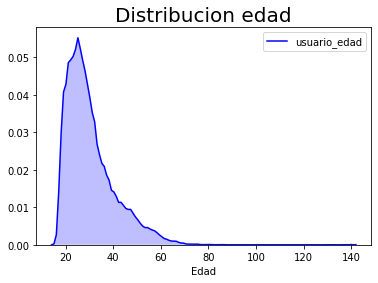

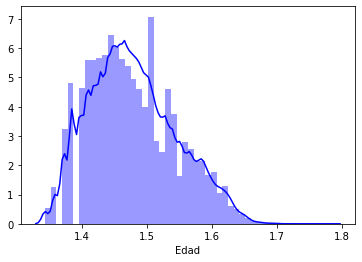

In [38]:
#Columna log precios
recorridos_por_usuario['log_edad'] = np.log(1+recorridos_por_usuario['usuario_edad'])
#Plot edad de usuario
sns.kdeplot(recorridos_por_usuario['usuario_edad'], color="b", shade = True)
plt.xlabel("Edad")
plt.title('Distribucion edad',size = 20)
plt.show()
#Plot Log-Precio
sns.distplot(np.log(1+recorridos_por_usuario['log_edad']),color='b')
plt.xlabel("Edad")
plt.show()

In [74]:

top_n = 200
top_estaciones_origen = recorridos_por_usuario['nombre_estacion_origen'].value_counts().index[0:top_n]
nuevodataframe = recorridos_por_usuario.groupby(["nombre_estacion_origen"])["nombreotrascolumnasquesemantienen", "nombreotrascolumnasquesemantienen"].sum()



print(top_estaciones_origen)

Index(['Facultad de Medicina', 'Parque Las Heras', 'Pacífico', 'Plaza Italia',
       'Parque Centenario', 'Congreso', 'Carlos Calvo', 'Once II',
       'Virrey Cevallos', 'Vera Peñaloza',
       ...
       'Usina del Arte', 'Hospital Argerich', 'Pinzón', 'Juan Manuel Blanes',
       'Santos Dumont y Otero', 'La Boca', 'Aduana', 'Hospital Sardá',
       'Plaza Hipólito Bouchard', 'Plaza Houssay'],
      dtype='object', length=198)


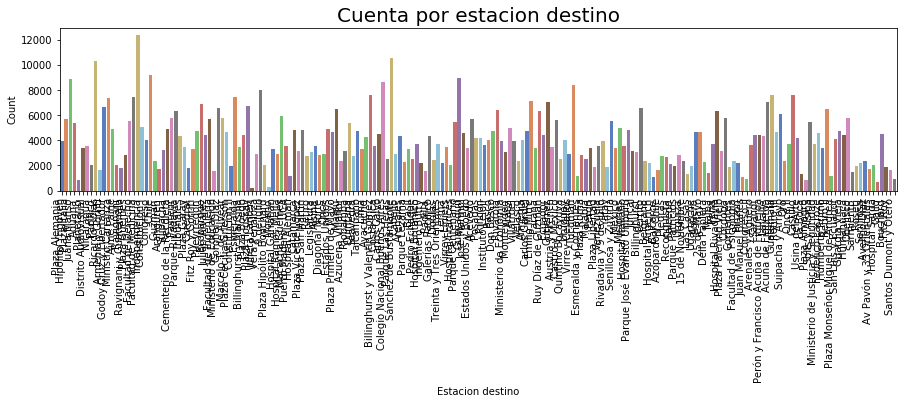

In [69]:
top_estaciones_destino = recorridos_por_usuario['nombre_estacion_destino'].value_counts()


plt.figure(figsize=(15,3))
g = sns.countplot(x='nombre_estacion_destino',data=recorridos_por_usuario, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cuenta por estacion destino',size = 20)
plt.xlabel("Estacion destino")
plt.ylabel("Count")
plt.show()